<a href="https://colab.research.google.com/github/jdmartinev/ArtificialIntelligenceIM/blob/main/Lecture05/notebooks/CNN_CIFAR_10_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN en CIFAR-10

En este cuaderno, debes poner en práctica lo que has aprendido y crear tu propio clasificador convolucional para el conjunto de datos CIFAR-10.

Las imágenes en CIFAR-10 son imágenes RGB (3 canales) con tamaño 32x32 (es decir, tienen un tamaño de 3x32x32). Hay 10 clases diferentes. A continuación, se muestran algunos ejemplos.

![cifar10](https://github.com/DeepLearningDTU/02456-deep-learning-with-PyTorch/blob/master/static_files/cifar10.png?raw=1)


## Preliminaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

sns.set_style("whitegrid")

def accuracy(target, pred):
    return metrics.accuracy_score(target, np.argmax(pred, axis=1))

def compute_confusion_matrix(target, pred, normalize=None):
    return sk_confusion_matrix(
        target,
        pred,
        normalize=normalize
    )

def show_image(img):
    img = img / 2 + 0.5   # unnormalize
    with sns.axes_style("white"):
        plt.figure(figsize=(8, 8))
        plt.imshow(np.transpose(img, (1, 2, 0)))
        plt.axis('off')
        plt.show()


In [ ]:
batch_size = 64  # both for training and testing

# Define data augmentation and normalization transformations
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale from [0, 1] to [0, 1] (as images in CIFAR-10 are already in this range)
    featurewise_center=True,  # Set input mean to 0 over the dataset
    featurewise_std_normalization=True  # Divide inputs by the standard deviation of the dataset
)

test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale from [0, 1] to [0, 1]
    featurewise_center=True,
    featurewise_std_normalization=True
)

# Load CIFAR-10 dataset and apply transformations
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Compute statistics (mean and std) on training data and apply to both training and test data
train_datagen.fit(train_images)
test_datagen.mean = train_datagen.mean
test_datagen.std = train_datagen.std

# Create data generators
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size, shuffle=True)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=batch_size, shuffle=False)

# Map from class index to class name
classes = {index: name for index, name in enumerate(['airplane', 'automobile', 'bird', 'cat', 'deer',
                                                     'dog', 'frog', 'horse', 'ship', 'truck'])}


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [ ]:
# Training data information
print("Training data")
print("Number of points:", train_images.shape[0])

# Retrieve a batch of data
x, y = next(train_generator)
print("Batch dimension (B x H x W x C):", x.shape)  # Note: Keras uses (B x H x W x C) format

print(f"Number of distinct labels: {len(np.unique(train_labels))} (unique labels: {np.unique(train_labels)})")

# Test data information
print("\nTest data")
print("Number of points:", test_images.shape[0])

# Retrieve a batch of data
x, y = next(test_generator)
print("Batch dimension (B x H x W x C):", x.shape)

print(f"Number of distinct labels: {len(np.unique(test_labels))} (unique labels: {np.unique(test_labels)})")

n_classes = len(np.unique(test_labels))

Training data
Number of points: 50000
Batch dimension (B x H x W x C): (64, 32, 32, 3)
Number of distinct labels: 10 (unique labels: [0 1 2 3 4 5 6 7 8 9])

Test data
Number of points: 10000
Batch dimension (B x H x W x C): (64, 32, 32, 3)
Number of distinct labels: 10 (unique labels: [0 1 2 3 4 5 6 7 8 9])


### Mostrar imágenes de ejemplo

Ejecuta varias veces para ver diferentes ejemplos.


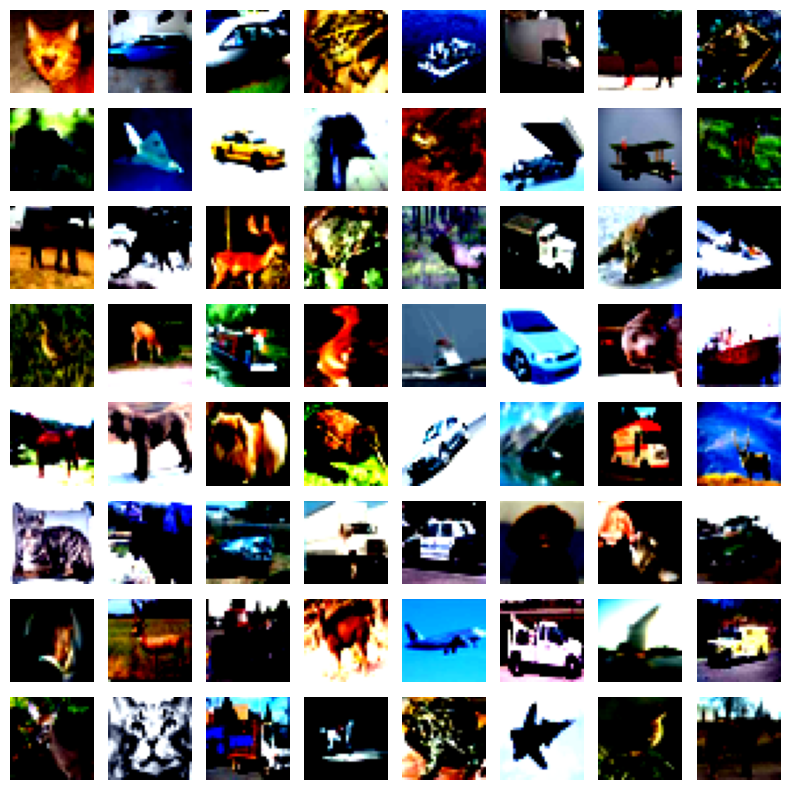

In [ ]:
# Get a batch of random training images and show them
images, labels = next(train_generator)

# Function to display images in a grid
def show_image_grid(images):
    grid_size = int(np.sqrt(images.shape[0]))  # assuming square grid
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))
    axes = axes.flatten()

    for img, ax in zip(images, axes):
        img = np.clip(img, 0, 1)  # Ensure the image data is within [0, 1]
        ax.imshow(img)  # No need to transpose; images are already in (H, W, C) format
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Show the images in a grid
show_image_grid(images)

## Define una red neuronal convolucional

**Tarea 1:** Define una red neuronal convolucional.  
Puedes utilizar el código de cuadernos anteriores.  
Te sugerimos que comiences con una red pequeña y te asegures de que todo esté funcionando correctamente.  
Una vez que puedas entrenar con éxito, vuelve y mejora la arquitectura.

In [ ]:
# Custom model definition
class Model(tf.keras.Model):
    def __init__(self, num_classes):
        super(Model, self).__init__()
        self.num_classes = num_classes

        # Define your layers here, without specifying input_shape


    def call(self, x):
        # Define the forward pass here

        return x

# Define the input shape using Input layer
input_shape = (32, 32, 3)
inputs = tf.keras.Input(shape=input_shape)

# Instantiate the model
n_classes = 10  # Number of classes, adjust as needed
model = Model(n_classes)

# Connect the input to the model
outputs = model(inputs)

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=outputs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ model_2 (Model)                      │ (None, 10)                  │       6,443,338 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,443,338 (24.58 MB)

 Trainable params: 6,443,338 (24.58 MB)

 Non-trainable params: 0 (0.00 B)

## Define una función de pérdida y un optimizador

**Tarea 2:** Define la función de pérdida y el optimizador.  
Es posible que necesites experimentar un poco con la tasa de aprendizaje.

In [ ]:
# Compile the model using SparseCategoricalCrossentropy with from_logits=True
model.compile(optimizer=#code,
              loss=#code,
              metrics=#code)

# Print the model summary
model.summary()


## Entrena la red

**Tarea 3:** Completa el bucle de entrenamiento a continuación.  
Comienza utilizando un número pequeño de épocas (por ejemplo, 2).  
Incluso con un número bajo de épocas deberías poder ver resultados que son mejores que el azar.  
Cuando todo esté funcionando, aumenta el número de épocas para descubrir qué tan buena es realmente tu red.


In [ ]:
# Test the forward pass with dummy data
dummy_input = np.random.randn(2, 32, 32, 3).astype(np.float32)  # Generate dummy data with shape (2, 32, 32, 3)

# Perform a forward pass
out = model(dummy_input)

# Print the output shape
print("Output shape:", out.shape)

# Print the output logits
print(f"Output logits:\n{out.numpy()}")

# Convert logits to probabilities using softmax
probabilities = tf.nn.softmax(out, axis=1)
print(f"Output probabilities:\n{probabilities.numpy()}")

Output shape: (2, 10)
Output logits:
[[-0.21252999  0.00900993  0.3677169  -0.01532208 -0.17913732 -0.23157503
   0.07234159 -0.04515815 -0.34443069 -0.25935405]
 [ 0.15078638  0.01548563  0.3544352   0.00668247 -0.06651857 -0.11203933
   0.18553467 -0.02342162 -0.14154339 -0.23266238]]
Output probabilities:
[[0.08613238 0.10749298 0.15387376 0.10490902 0.08905714 0.08450752
  0.11452089 0.10182518 0.07548884 0.08219229]
 [0.11309415 0.09878246 0.13863847 0.09791667 0.09100512 0.08695538
  0.11709306 0.0950129  0.08442731 0.07707445]]


In [ ]:
# Parameters
num_epochs = 2

# Train the model using the `fit` method
history = model.fit(#code,
                    epochs=#code,
                    validation_data=#code)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9534 - loss: 0.1434 - val_accuracy: 0.4803 - val_loss: 106.7130
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9818 - loss: 0.0609 - val_accuracy: 0.5122 - val_loss: 126.9042


## Prueba la red

Ahora mostramos un lote de imágenes de prueba y generamos una tabla a continuación con la clase verdadera y la clase predicha para cada una de estas imágenes.


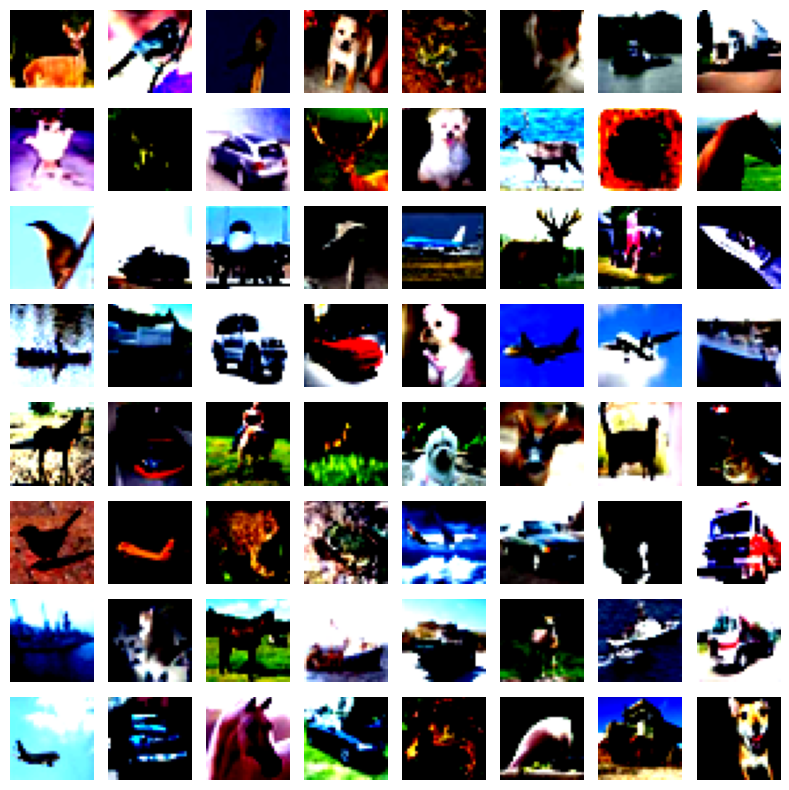

    TRUE        PREDICTED
-----------------------------
    deer          deer     
    bird          frog     
    bird          bird     
     dog           dog     
    frog          frog     
     cat           dog     
    ship          ship     
    truck         truck    
     dog           cat     
    frog          frog     
 automobile    automobile  
    deer          deer     
     dog           cat     
    deer          bird     
    frog          frog     
    horse         horse    
    bird          bird     
 automobile       ship     
  airplane        deer     
    bird          bird     
  airplane      airplane   
    deer          deer     
    truck         truck    
    ship          ship     
    ship        airplane   
    truck         truck    
 automobile       truck    
 automobile    automobile  
     dog           dog     
  airplane      airplane   
  airplane      airplane   
    ship          ship     
    horse         horse    
 automobile    autom

In [ ]:
# Retrieve a batch of test data
inputs, targets = next(iter(test_generator))

# Show the image grid
show_image_grid(inputs)

# Get predictions from the model
outputs = model(inputs, training=False)
predicted = tf.argmax(outputs, axis=1)

# Print true vs predicted labels
print("    TRUE        PREDICTED")
print("-----------------------------")
for target, pred in zip(targets.flatten(), predicted.numpy()):
    print(f"{classes[target]:^13} {classes[pred]:^13}")


Ahora evaluamos la red como se hizo anteriormente, pero en todo el conjunto de prueba. Aquí informamos la **precisión promedio en la prueba** (número de predicciones correctas dividido por el tamaño del conjunto de prueba).

Además examinamos un poco más a fondo el rendimiento del clasificador utilizando la **matriz de confusión**. La entrada en la fila i y columna j indica el número de muestras con etiqueta verdadera siendo la clase i y etiqueta predicha siendo la clase j.

Normalizamos las filas: dado un conjunto de ejemplos de una clase específica (fila), podemos observar cómo son clasificados por nuestro modelo. Idealmente, nos gustaría que las entradas en las diagonales fueran 1, y todo lo demás 0. Esto significaría que todos los ejemplos de esa clase están clasificados correctamente.

Las clases que son más difíciles de clasificar para nuestro modelo tienen números más bajos en la diagonal. Luego podemos ver exactamente *cómo* se clasifican incorrectamente observando el resto de la fila.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5166 - loss: 125.2345
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test loss: 126.904
Test accuracy: 0.512
Confusion Matrix:
[[719  17  74  23  15   8  26  13  86  19]
 [101 574   5  26   5  17  29  14 116 113]
 [211  14 298  90  47  95 125  74  27  19]
 [124  23  49 290  57 172  96  94  57  38]
 [152  18  70  77 309  71  95 152  38  18]
 [ 70  14  54 162  34 435  65 117  34  15]
 [ 52  18  29  89  38  80 611  35  34  14]
 [ 73  13  23  48  65  94  13 614  18  39]
 [190  30  34  13   4   8  11   8 677  25]
 [113  79   7  24   9  19  10  33 111 595]]


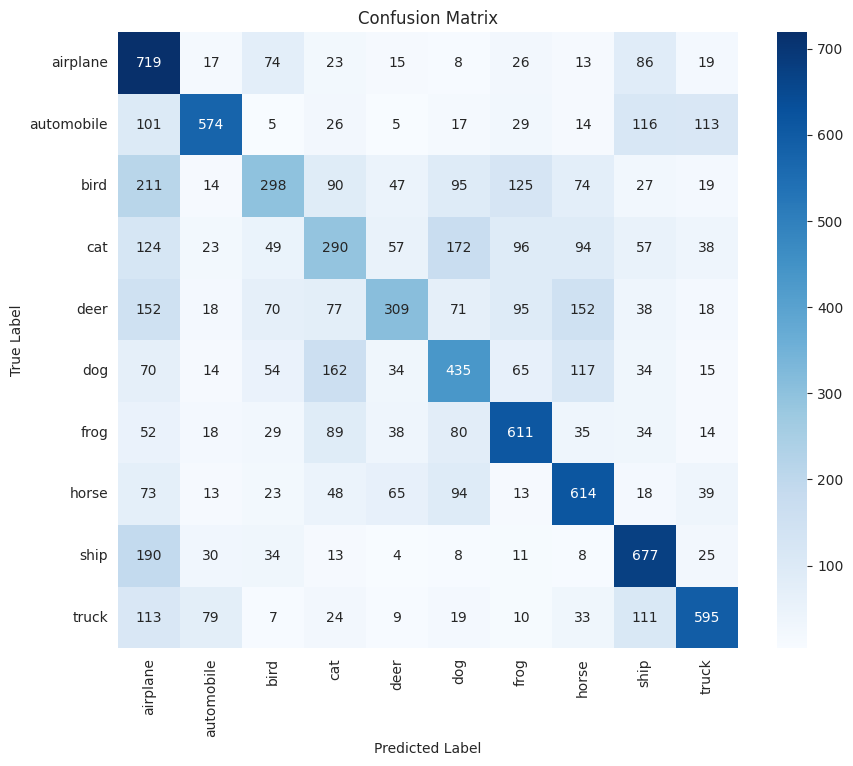

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Get predictions for the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
conf_matrix = compute_confusion_matrix(test_labels.flatten(), predicted_classes)

print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Aquí nos enfocamos en la diagonal y representamos los números en un gráfico de barras. Esto nos da una imagen más clara de la precisión del modelo para diferentes clases.


**Tarea 4:**
1. Vuelve atrás y mejora el rendimiento de la red. Usando suficientes capas convolucionales con suficientes canales (y entrenando durante el tiempo suficiente), deberías poder alcanzar fácilmente una precisión de prueba superior al 60%. ¡Pero ve hasta dónde puedes llegar! ¿Puedes alcanzar el 70%?

2. Describe brevemente lo que hiciste y cualquier experimento que realizaste, así como los resultados que obtuviste.
¿Hubo algo que te sorprendiera durante el ejercicio?
¿Cuáles fueron los cambios que parecieron mejorar el rendimiento más?

3. Escribe las lecciones o conocimientos clave que obtuviste durante este ejercicio.

**Respuesta:**


# Entrenamiento en GPU

**Tarea Opcional:**
Si tienes una GPU, te sugerimos que intentes entrenar tu modelo en la GPU. Para ello, necesitas mover el modelo a la GPU después de definirlo, lo que recorrerá recursivamente todos los módulos y convertirá sus parámetros y buffers a tensores CUDA. También necesitas transferir tanto las entradas como los objetivos a la GPU en cada paso de entrenamiento, antes de realizar la pasada hacia adelante.

El código para esto ya está en su lugar: Solo tienes que activar la GPU




Es posible que no notes una aceleración significativa al usar una GPU. Esto probablemente se deba a que tu red es realmente pequeña. Intenta aumentar el ancho de tu red (número de canales en las capas convolucionales) y observa si notas alguna aceleración en la GPU en comparación con la CPU.


# Ejercicio del libro de Michael Nielsen

**Tarea 5:** Elige un ejercicio de tu preferencia del [libro de Michael Nielsen](http://neuralnetworksanddeeplearning.com/).

**Respuesta:**



